## Forecasting bitcoin price

In [77]:
import requests
import json
import pandas as pd
from prophet import Prophet

In [78]:
# Read APIkey file
with open("api_key.json") as f:
    config = json.load(f)
    api_key = config["api_key"]

In [79]:
# Read BTC data from FMP
symbol = "BTCUSD"
from_date = "2022-01-01"
to_date = "2023-11-28"
url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={from_date}&to={to_date}&apikey={api_key}"

# Function to get the data from FMP
def get_data_FMP(url):
    response = requests.get(url).json()
    return response

In [80]:
data_btc = fetch_data(url)
print(data_btc)

{'symbol': 'BTCUSD', 'historical': [{'date': '2023-11-28', 'open': 37447.42, 'high': 37569.23, 'low': 36707, 'close': 37242.7, 'adjClose': 37287.375, 'volume': 19107330048, 'unadjustedVolume': 19107330048, 'change': -204.72, 'changePercent': -0.54669, 'vwap': 37241.59, 'label': 'November 28, 23', 'changeOverTime': -0.0054669}, {'date': '2023-11-27', 'open': 37469.9, 'high': 37578.42, 'low': 36715.1, 'close': 37251.73, 'adjClose': 37251.73, 'volume': 779902219, 'unadjustedVolume': 779902219, 'change': -218.17, 'changePercent': -0.58225, 'vwap': 37063.17, 'label': 'November 27, 23', 'changeOverTime': -0.0058225}, {'date': '2023-11-26', 'open': 37781, 'high': 37842.17, 'low': 37117, 'close': 37462.79, 'adjClose': 37479.12109, 'volume': 13744796068, 'unadjustedVolume': 13744796068, 'change': -318.21, 'changePercent': -0.84225, 'vwap': 37491.34, 'label': 'November 26, 23', 'changeOverTime': -0.0084225}, {'date': '2023-11-25', 'open': 37748.85, 'high': 37920.27, 'low': 37583, 'close': 37805.

In [81]:
type(data_btc)

dict

In [82]:
df = pd.DataFrame(data_btc['historical'])
df[['date', 'close']]

,date,close
0,2023-11-28,37242.70
1,2023-11-27,37251.73
2,2023-11-26,37462.79
3,2023-11-25,37805.99
4,2023-11-24,37745.84
...,...,...
692,2022-01-05,43436.04
693,2022-01-04,45814.61
694,2022-01-03,46459.56
695,2022-01-02,47299.07


In [83]:
def create_dataframe_btc(data):
    df = pd.DataFrame(data["historical"])
    # Rename columns for prophet compatibility
    df.rename(columns={'date': 'ds',
                       'adjClose': 'y'}, 
                       inplace=True)
    # filtering the dataframe
    df = df[['ds','y']]
    return df

# Creating the dataframe
df_forecasting = create_dataframe_btc(data_btc)

In [84]:
df = preprocess_data(data_btc)

In [85]:
df.head()

,ds,y
0,2023-11-28,37287.37500
1,2023-11-27,37251.73000
2,2023-11-26,37479.12109
3,2023-11-25,37796.79297
4,2023-11-24,37720.28125


In [86]:
df_forecasting = df[['ds','y']]

In [87]:
prophet_model = Prophet(
        changepoint_prior_scale=0.01,
        holidays_prior_scale=15,
        seasonality_prior_scale=10,
        weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False
    )
model = prophet_model(df_forecasting)

" def prophet_model(data):\n    model = Prophet(\n        changepoint_prior_scale=0.05,\n        holidays_prior_scale=15,\n        seasonality_prior_scale=15,\n        weekly_seasonality=True,\n        yearly_seasonality=True,\n        daily_seasonality=False)\n    model.add_country_holidays(country_name='US')\n    model.fit(data)\n    return model "

In [88]:
def forecast_period(model, periods=365):
    future_values = model.make_future_dataframe(periods = periods)
    forecast_values = model.predict(future_values)
    return forecast_values

' # plot forecast\nmodel.plot(forecast) '

In [90]:
forecast = forecast_period(model)

c:\Users\owner\miniconda3\envs\mt5\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\owner\miniconda3\envs\mt5\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



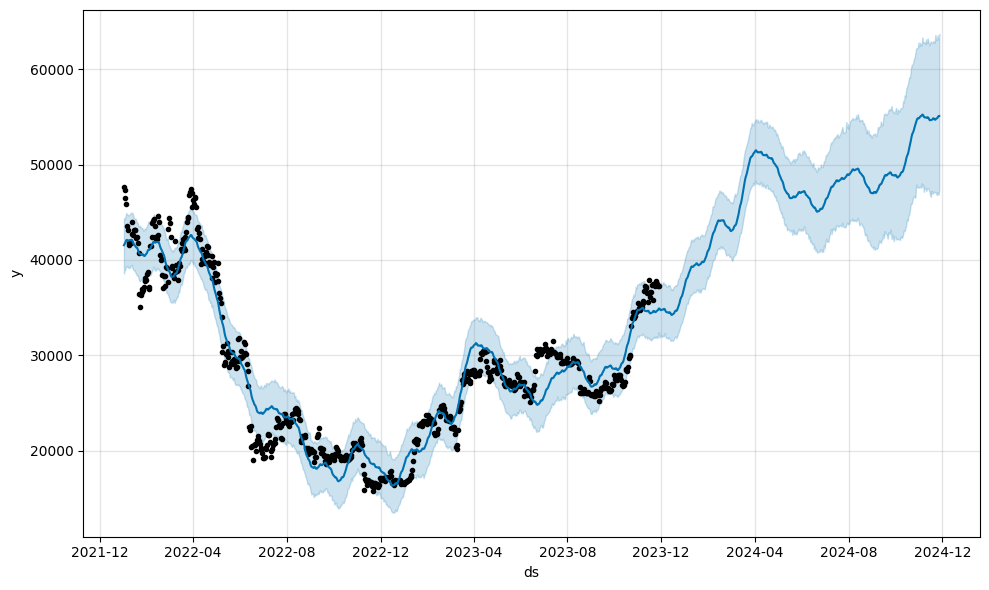

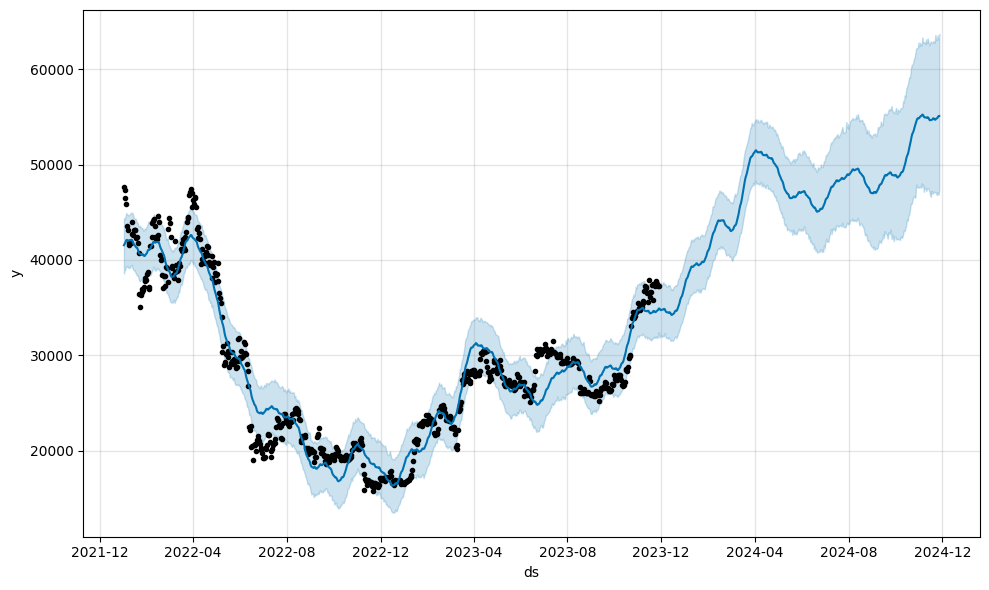

In [91]:
model.plot(forecast)

In [92]:
df = forecast
df = df[df['ds'] >= '2024-01-01']

In [93]:
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

username='Med_charts'

# Read APIkey plotly file
with open("api_key_plotly.json") as f:
    config = json.load(f)
    api_key = config["api_key_plotly"]

chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)


In [94]:
trace = go.Scatter(
    x=df['ds'],
    y=df['yhat'],
    mode='lines',
    name='yhat',
    marker=dict(color='red')
)
fill_lower = go.Scatter(
    x=df['ds'],
    y=df['yhat_lower'],
    mode='lines',
    fill='tonexty',
    name='lower bound'
)

#fill.update(dict(x=df['ds'].append(df['ds'][::-1]), y=df['yhat_upper'].append(df['yhat_lower'][::-1])))

fill_upper = go.Scatter(
    x=df['ds'],
    y=df['yhat_upper'],
    mode='lines',
    fill='tonexty',
    name='upper bound'
)

#fill.update(dict(x=df['ds'].append(df['ds'][::-1]), y=df['yhat_upper'].append(df['yhat_lower'][::-1])))

layout = go.Layout(
    title='Forecast BTC/USD Chart',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

layout.shapes = [
    dict(
        type='line',
        x0='2024-04-19',
        x1='2024-04-19',
        y0=0,
        y1=1,
        line=dict(dash='dash', color='red'),
        name='Event',
        xref='x',
        yref='paper'
    )
]

fig = go.Figure(data=[trace, fill_lower, fill_upper], layout=layout)

fig.show()


In [95]:
py.plot(fig, filename="BTC_forecasting", auto_open = True)

'https://plotly.com/~Med_charts/1/'